dt: 0.020080321285140562
fps: 49.8
damping b=1.00249


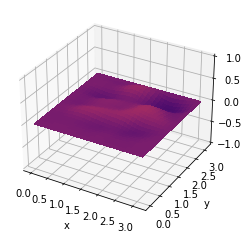

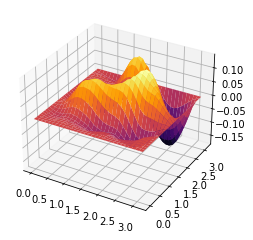

In [1]:
#Full 2D wave equation solver with flexible boundary conditions, non-uniform tension, and animation capabilities. Some animations
#are found in the animations folder.

#%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from matplotlib import colors
from matplotlib import cm
#np.set_printoptions(precision=2)

v=1            #propagation speed (m/s)
r=0.0001         #damping
n=31          #spatial points x
m=31          #spatial points y
l=250         #temporal points
[x1,x2]=[0,np.pi]    #spatial boundaries x (m)
[y1,y2]=[0,np.pi]    #spatial boundaries y (m)
[t1,t2]=[0,5]  #temporal boundaries (s)
dx=(x2-x1)/(n-1)     #spatial step size (m)
dy=(y2-y1)/(m-1)
dt=(t2-t1)/(l-1)   #temporal step size (s)
x=np.linspace(x1,x2,n)
y=np.linspace(y1,y2,m)
t=np.linspace(t1,t2,l)
fps=1/dt
print('dt: '+str(dt))
print('fps: '+str(fps))

a=(dx**2+dy**2)/(dx**2*dy**2)

bound=np.zeros((n+2,m+2))
bound[0:2,:]=1
bound[n:n+2,:]=1
bound[:,0:2]=1
bound[:,m:m+2]=1
bound[int(n/2)+1,1:int(m/2+2)]=1
#print(bound)

interior=np.ones((n+2,m+2))-bound
#print(interior)

u=np.zeros((l,n,m))  #the grid in t,x,y
u2=np.zeros((l,n,m))  #the grid in t,x,y
col1=np.zeros((l,n,m,4))  #the grid in t,x,y
col2=np.zeros((l,n,m,4))  #the grid in t,x,y
#rint(u[0][interior==1])
#print(u[0,2:n,2:m])
Y,X=np.meshgrid(y,x)
fx=np.sin(2*X)**2  #initial u(t=0)
fx[int(n/2):,:]=0
fy=np.sin(3*Y)**2
fy[:,int(m/3):]=0
f=fx*fy
gx=0*X    #initial u'(t=0)
gy=0*Y
g=gx+gy

fx2=np.sin(2*X)**2  #initial u(t=0)
fx2[:int(n/2),:]=0
fy2=np.sin(3*Y)**2
fy2[:,:int(m/3)]=0
fy2[:,int(2*m/3):]=0
f2=fx2*fy2
gx2=0*X    #initial u'(t=0)
gy2=0*Y
g2=gx2+gy2

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_zlim(-1, 1)
plt.xlabel('x')
plt.ylabel('y')

u[0,:,:]=f
u2[0,:,:]=f2
L0=1/dy**2*(u[0,1:n-1,2:m]+u[0,1:n-1,0:m-2]) + 1/dx**2*(u[0,2:n,1:m-1]+u[0,0:n-2,1:m-1]) -2*a*u[0,1:n-1,1:m-1]
L02=1/dy**2*(u2[0,1:n-1,2:m]+u2[0,1:n-1,0:m-2]) + 1/dx**2*(u2[0,2:n,1:m-1]+u2[0,0:n-2,1:m-1]) -2*a*u2[0,1:n-1,1:m-1]
u[1,1:n-1,1:m-1]=v**2/2*dt**2*L0 + u[0,1:n-1,1:m-1] + dt*g[1:n-1,1:m-1]
u2[1,1:n-1,1:m-1]=v**2/2*dt**2*L02 + u2[0,1:n-1,1:m-1] + dt*g2[1:n-1,1:m-1]

b=1+r*v**2/(2*dt)
print('damping b='+str(b))

for k in range(1,l-1):
    #L=1/dy**2*(u[k,2:n+1,]*bound
    #L=1/dy**2*(u[k,1:n-1,2:m]+u[k,1:n-1,0:m-2]) + 1/dx**2*(u[k,2:n,1:m-1]+u[k,0:n-2,1:m-1]) -2*a*u[k,1:n-1,1:m-1]    #Laplacian at time k of sheet x,y
    #u[k+1,1:n-1,1:m-1]=v**2*dt**2*L + 2*u[k,1:n-1,1:m-1] - u[k-1,1:n-1,1:m-1]
    #u[k+1,0:int(n/2),int(m/3)]=0
    
    L=1/dy**2*(u[k,1:n-1,2:m]+u[k,1:n-1,0:m-2]) + 1/dx**2*(u[k,2:n,1:m-1]+u[k,0:n-2,1:m-1]) -2*a*u[k,1:n-1,1:m-1]    #Laplacian at time k of sheet x,y
    u[k+1,1:n-1,1:m-1]=v**2*dt**2/b*L + 2/b*u[k,1:n-1,1:m-1] - (1-r*v**2/(2*dt))/b*u[k-1,1:n-1,1:m-1]
    #u[k+1,0:int(2.*n/3),int(m/3)]=0
    #u[k+1,int(2.*n/3)-1,int(m/3):int(2.*m/3)]=0
    L2=1/dy**2*(u2[k,1:n-1,2:m]+u2[k,1:n-1,0:m-2]) + 1/dx**2*(u2[k,2:n,1:m-1]+u2[k,0:n-2,1:m-1]) -2*a*u2[k,1:n-1,1:m-1]
    u2[k+1,1:n-1,1:m-1]=v**2*dt**2/b*L2 + 2/b*u2[k,1:n-1,1:m-1] - (1-r*v**2/(2*dt))/b*u2[k-1,1:n-1,1:m-1]

#for k in range(0,l):
#    col1[k]=cm.spring_r(u[k,:,:]/np.max(u))
#    col2[k]=cm.autumn_r(u[k,:,:]/np.max(u))
#    col1[k]=np.repeat(u[k,:,:,np.newaxis], 4, axis=2)*col1[k]
#    col2[k]=np.repeat(u2[k,:,:,np.newaxis], 4, axis=2)*col2[k]
#    col2[k]=(col1[k]+col2[k])/(np.repeat(u[k,:,:,np.newaxis], 4, axis=2)+np.repeat(u2[k,:,:,np.newaxis], 4, axis=2))
#    #(u[k,:,:]*col1[k]+u2[k,:,:]*col2[k])/(u[k,:,:]+u2[k,:,:])
#    #col[k]=(col1[k]+col2[k])/2#(u[k,:,:]*col1[k]+u2[k,:,:]*col2[k])/(u[k,:,:]+u2[k,:,:])
#    np.nan_to_num(col2)

#for k in range(0,l):
#    print(np.round(u[k],2))

wframe=None
def animate(i):
    global wframe
    if wframe:
        ax.collections.remove(wframe)
    wframe=ax.plot_surface(X,Y,u[i,:,:],cmap='inferno',norm=colors.Normalize(vmin=np.min(u),vmax=np.max(u)),antialiased=False,shade=True)

ani = animation.FuncAnimation(fig, animate, interval=1000/fps,frames=l)

#plt.show()

#animation.writers.list()

fn = 'wave_equation_plot'
ani.save(fn+'.mp4',writer='ffmpeg',fps=int(fps),dpi=250)
#ani

fig2=plt.figure()
ax2=fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,u[-1,:,:],cmap='inferno')
plt.show()